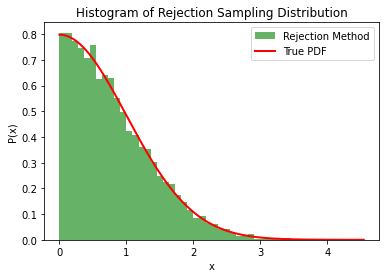

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def target_distribution(x):
    """ Target distribution f(x) = sqrt(2/pi) * exp(-x^2 / 2) for x >= 0 """
    return np.sqrt(2 / np.pi) * np.exp(-x**2 / 2)

def proposal_distribution(x):
    """ Proposal distribution g(x) = exp(-x) for x >= 0 (exponential distribution with lambda=1) """
    return np.exp(-x)

def rejection_sampling(n_samples):
    samples = []
    M = np.sqrt(2 / np.pi) * np.sqrt(2 * np.e)  # Choose M to be the maximum of f(x) / g(x)
    
    while len(samples) < n_samples:
        x = np.random.exponential(scale=1)  # Sample from the exponential distribution
        u = np.random.uniform(0, M * proposal_distribution(x))  # Sample uniformly between 0 and M * g(x)
        
        if u < target_distribution(x):
            samples.append(x)
    
    return np.array(samples)

n_samples = 10000
samples = rejection_sampling(n_samples)

plt.hist(samples, bins=50, density=True, alpha=0.6, color='g', label='Rejection Method')
x = np.linspace(0, max(samples), 1000)
pdf = target_distribution(x)
plt.plot(x, pdf, 'r-', lw=2, label='True PDF')

plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Histogram of Rejection Sampling Distribution')
plt.legend()
plt.show()